# Learning Vector Quantization

The representation for LVQ is a collection of **codebook vectors**. A codebook vector is a list of numbers that have the same input and output attributes as your training data.

The model representation is a fixed pool of codebook vectors, learned from the training data. They look like training instances, but the values of each attribute have been adapted based on the learning procedure. In the language of neural networks, each codebook vector may be called a neuron, each attribute on a codebook vector is called a weight and the collection of codebook vectors is called a network.

## Creating Fake Data

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=101)

In [3]:
print("First 5 X:")
print(X[0:5,])
print("\nFirst 5 y:")
print(y[0:5])

First 5 X:
[[ 2.34669706  1.99811892]
 [ 2.40710326  2.2038783 ]
 [-0.077088   -1.43258858]
 [ 2.73918283  1.15325581]
 [-0.75506174  0.61430643]]

First 5 y:
[1 1 0 1 1]


In [4]:
import matplotlib.pyplot as plt

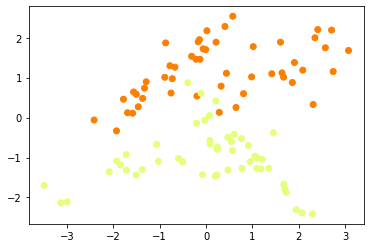

In [5]:
plt.scatter(X[:,0], X[:,1], c = y, cmap="Wistia")

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
import numpy as np

In [13]:
data = np.column_stack((X_train, y_train))

In [14]:
data.shape

(80, 3)

## Learning LVQ model from data
Learning process can be divided into following steps:

1) Calculating Euclidean Distance  
2) Calculating the Best Matching Unit(BMU)  
3) Training the Codebook vectors  

### Step 1: Calculating Euclidean Distance
Instead of finding the actual euclidean distance we can use square of that distance because we just want a measure not the actual distance.

In [15]:
def euclidean_distance(row1, row2):
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return distance

### Step 2: Finding BMU
The Best Matching Unit or BMU is the codebook vector that is most similar to a new piece of data.

To locate the BMU for a new piece of data within a dataset we must first calculate the distance between each codebook to the new piece of data. Once distances are calculated, we must sort all of the codebooks by their distance to the new data. We can then return the first or most similar codebook vector.

In [25]:
def get_bmu(codebooks, new_row):
    distances = []
    for codebook in codebooks:
        dist = euclidean_distance(codebook, new_row)
        distances.append((codebook, dist))
    distances.sort(key = lambda t: t[1])
    return distances[0][0]

### Step 3: Training Codebook vectors

The first step in training a set of codebook vectors is to initialize the set.

In [23]:
from random import randrange
def random_codebook(train):
    n_records = len(train)
    n_features = len(train[0])
    codebook = [train[randrange(n_records)][i] for i in range(n_features)]
    return codebook

After this, the best matching unit is found for each training pattern and only this best matching unit is updated. The difference between the training pattern and the BMU is calculated as the error. The class values are compared. If they match, the error is added to the BMU to bring it closer to the training pattern, otherwise, it is subtracted to push it further away. The amount that the BMU is adjusted is controlled by a learning rate.

If class matches:
### $x = x+\alpha(t-x)$

If class doesn't matches:
### $x = x-\alpha(t-x)$

Learning rate changes according to the following formula:
### $learningRate = \alpha\cdot(1-\frac{Epoch}{Max Epoch})$

In [19]:
def fit(train, n_codebooks, lrate, epochs):
    codebooks = [random_codebook(train) for _ in range(n_codebooks)]
    for epoch in range(epochs):
        rate = lrate*(1-(epoch/epochs))
        sum_error = 0
        for row in train:
            bmu = get_bmu(codebooks, row)
            for i in range(len(row)-1):
                error = row[i] - bmu[i]
                sum_error += error**2
                if bmu[-1] == row[-1]:
                    bmu[i] += rate*error
                else:
                    bmu[i] -= rate*error
        print("Epoch: %d, error: %.3f" % (epoch, sum_error))
    return codebooks

In [43]:
codebooks = fit(data, 4, 0.5, 20)

Epoch: 0, error: 105.984
Epoch: 1, error: 89.892
Epoch: 2, error: 94.383
Epoch: 3, error: 93.021
Epoch: 4, error: 91.772
Epoch: 5, error: 86.392
Epoch: 6, error: 85.651
Epoch: 7, error: 84.557
Epoch: 8, error: 83.562
Epoch: 9, error: 81.112
Epoch: 10, error: 80.245
Epoch: 11, error: 79.429
Epoch: 12, error: 78.428
Epoch: 13, error: 77.971
Epoch: 14, error: 77.100
Epoch: 15, error: 76.213
Epoch: 16, error: 75.390
Epoch: 17, error: 74.636
Epoch: 18, error: 71.237
Epoch: 19, error: 69.744


In [46]:
for i in codebooks:
    print(i)

[-1.7044161464062937, -1.2916694165614362, 0.0]
[0.8243777743259082, -1.0545765533356721, 0.0]
[0.8759917319205104, 1.3814029793541176, 1.0]
[-1.3530155758758367, 0.6668907016754062, 1.0]


## Making Prediction
Once the codebook vectors are learned, they can be used to make predictions. We can use the same procedure as KNN to make predictions, although K is set to 1.

In [47]:
def predict(test, codebooks):
    pred=[]
    for row in test:
        bmu = get_bmu(codebooks, row)
        pred.append(bmu[-1])
    return pred

In [49]:
pred = predict(X_test, codebooks)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[9 1]
 [1 9]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

